In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Employee.csv')
df.shape

(148, 6)

In [3]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [4]:
df.duplicated().sum()

np.int64(4)

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(144, 6)

In [6]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      127 non-null    float64
 2   Salary   121 non-null    float64
 3   Place    130 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 6.9+ KB


In [8]:
df.isnull().sum()

Company     8
Age        17
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [9]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [10]:
df.nunique()

Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64

In [11]:
df['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [12]:
df['Company'] = df['Company'].replace('Infosys Pvt Lmt', 'Infosys')
df['Company'] = df['Company'].replace('Tata Consultancy Services', 'TCS')
df['Company'] = df['Company'].replace('CTS', 'Cognizant')
df['Company'] = df['Company'].replace('Congnizant', 'Cognizant')
df['Company'].unique()

array(['TCS', 'Infosys', 'Cognizant', nan], dtype=object)

### Statistical Analysis

In [13]:
df.describe()

,Age,Salary,Gender
count,127.000000,121.000000,144.000000
mean,30.527559,5283.471074,0.222222
std,11.114717,2585.373600,0.417191
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,33.000000,5000.000000,0.000000
75%,37.500000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [14]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr

In [15]:
df[(df['Age']<lower)&df['Age']>upper]

,Company,Age,Salary,Place,Country,Gender


In [16]:
df['Age'].unique()

array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.])

In [17]:
df[(df['Salary']<lower) & (df['Salary']>upper)]

,Company,Age,Salary,Place,Country,Gender


In [18]:
df.isnull().sum()

Company     8
Age        17
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [19]:
df['Company'].mode()[0]

'TCS'

In [20]:
df['Company'] = df['Company'].fillna(df['Company'].mode()[0])

In [21]:
df[df['Age']==0]

,Company,Age,Salary,Place,Country,Gender
87,Infosys,0.0,3030.0,Calcutta,India,0
91,TCS,0.0,3045.0,Delhi,India,0
100,Cognizant,0.0,2034.0,Podicherry,India,0
106,TCS,0.0,9024.0,Chennai,India,1
110,Infosys,0.0,3234.0,Mumbai,India,0
120,Cognizant,0.0,1234.0,Calcutta,India,0


In [22]:
df['Age'] = df['Age'].replace(0,np.nan)

In [23]:
mean_age = df['Age'].mean()
rounded_mean = round(mean_age,0)
df['Age'] = df['Age'].fillna(rounded_mean)

In [24]:
mean_salary = round(df['Salary'].mean(),0)
df['Salary'] = df['Salary'].fillna(mean_salary)

In [25]:
df['Place'] = df['Place'].fillna(df['Place'].mode()[0])

In [26]:
df.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

### Data Analysis

In [27]:
df[(df['Age']>40) & (df['Salary']<5000)]

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
85,Infosys,41.0,3000.0,Delhi,India,0
92,Infosys,54.0,3184.0,Mumbai,India,0
103,Infosys,44.0,4034.0,Delhi,India,0


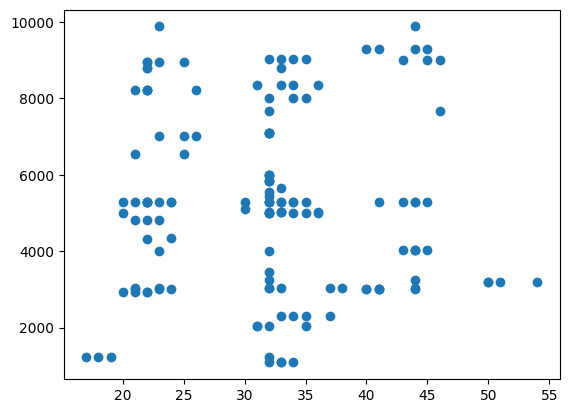

In [28]:
plt.scatter(df['Age'],df['Salary'])

### Observation from Scatter Plot:
There is no correlation btw salary and age

In [29]:
df['Place'].value_counts()

Place
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

<Axes: xlabel='Place', ylabel='count'>

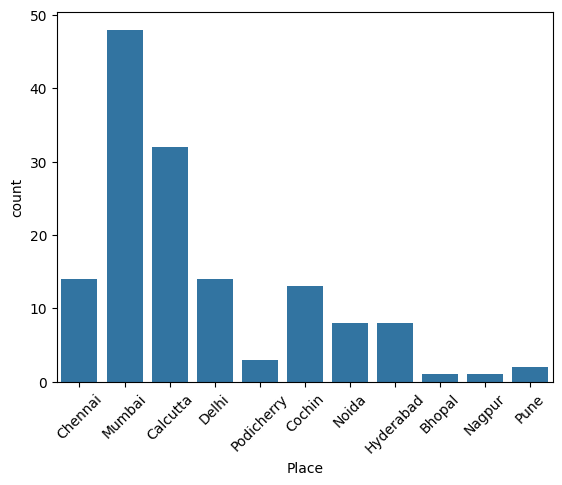

In [30]:
plt.xticks(rotation=45)
sns.countplot(x='Place',data=df)

<BarContainer object of 11 artists>

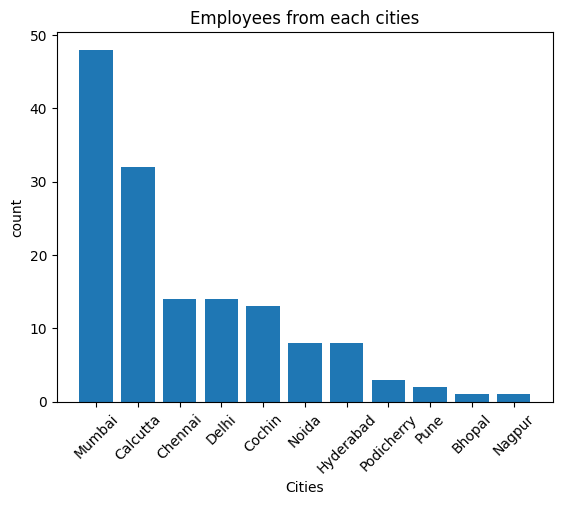

In [31]:
x = df['Place'].value_counts().index
y = df['Place'].value_counts().values

plt.xticks(rotation=45)
plt.title("Employees from each cities")
plt.xlabel("Cities")
plt.ylabel("count")
plt.bar(x,y)

#### Observations from the bar Chart:
Most of the employees are from Mumbai and least from Nagpur

### Data Encoding

gender columns is a nominal categorical column, so it couldn't be ranked like this.

In [32]:
df['Gender'] = df['Gender'].replace(0,'M')
df['Gender'] = df['Gender'].replace(1,'F')

In [33]:
df['Gender'].value_counts()

Gender
M    112
F     32
Name: count, dtype: int64

In [34]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.0,Chennai,India,M
1,Infosys,30.0,5283.0,Mumbai,India,M
2,TCS,35.0,2300.0,Calcutta,India,M
3,Infosys,40.0,3000.0,Delhi,India,M
4,TCS,23.0,4000.0,Mumbai,India,M


Here we have 4 categorical columns, Company, Place, Country & Gender and all of them are nominal categorical columns, since only country data is same everywhere , we can skip that.

In [35]:
df['Country'].unique()

array(['India'], dtype=object)

In [36]:
df.drop('Country',axis=1,inplace = True)

In [37]:
df.head()

,Company,Age,Salary,Place,Gender
0,TCS,20.0,5283.0,Chennai,M
1,Infosys,30.0,5283.0,Mumbai,M
2,TCS,35.0,2300.0,Calcutta,M
3,Infosys,40.0,3000.0,Delhi,M
4,TCS,23.0,4000.0,Mumbai,M


## ONE HOT ENCODING

In [38]:
df["Company"].unique()

array(['TCS', 'Infosys', 'Cognizant'], dtype=object)

In [39]:
df['Place'].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'], dtype=object)

In [40]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [41]:
df_encoded = pd.get_dummies(df, columns=['Company','Place','Gender'],drop_first=True)

In [42]:
df

,Company,Age,Salary,Place,Gender
0,TCS,20.0,5283.0,Chennai,M
1,Infosys,30.0,5283.0,Mumbai,M
2,TCS,35.0,2300.0,Calcutta,M
3,Infosys,40.0,3000.0,Delhi,M
4,TCS,23.0,4000.0,Mumbai,M
...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,M
140,TCS,33.0,9024.0,Calcutta,F
141,Infosys,44.0,4034.0,Delhi,F
142,TCS,33.0,5034.0,Mumbai,F


In [43]:
df_encoded

,Age,Salary,Company_Infosys,Company_TCS,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Gender_M
0,20.0,5283.0,False,True,False,True,False,False,False,False,False,False,False,False,True
1,30.0,5283.0,True,False,False,False,False,False,False,True,False,False,False,False,True
2,35.0,2300.0,False,True,True,False,False,False,False,False,False,False,False,False,True
3,40.0,3000.0,True,False,False,False,False,True,False,False,False,False,False,False,True
4,23.0,4000.0,False,True,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,22.0,8202.0,True,False,False,False,False,False,False,True,False,False,False,False,True
140,33.0,9024.0,False,True,True,False,False,False,False,False,False,False,False,False,False
141,44.0,4034.0,True,False,False,False,False,True,False,False,False,False,False,False,False
142,33.0,5034.0,False,True,False,False,False,False,False,True,False,False,False,False,False


## Label Encoder

In [44]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['le_company'] = label.fit_transform(df['Company'])
df.head(20)

,Company,Age,Salary,Place,Gender,le_company
0,TCS,20.0,5283.0,Chennai,M,2
1,Infosys,30.0,5283.0,Mumbai,M,1
2,TCS,35.0,2300.0,Calcutta,M,2
3,Infosys,40.0,3000.0,Delhi,M,1
4,TCS,23.0,4000.0,Mumbai,M,2
5,Infosys,32.0,5000.0,Calcutta,M,1
6,TCS,32.0,6000.0,Chennai,F,2
7,Infosys,23.0,7000.0,Mumbai,F,1
8,TCS,34.0,8000.0,Calcutta,F,2
9,Cognizant,45.0,9000.0,Delhi,M,0


### Feature Scaling

In [45]:
df

,Company,Age,Salary,Place,Gender,le_company
0,TCS,20.0,5283.0,Chennai,M,2
1,Infosys,30.0,5283.0,Mumbai,M,1
2,TCS,35.0,2300.0,Calcutta,M,2
3,Infosys,40.0,3000.0,Delhi,M,1
4,TCS,23.0,4000.0,Mumbai,M,2
...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,M,1
140,TCS,33.0,9024.0,Calcutta,F,2
141,Infosys,44.0,4034.0,Delhi,F,1
142,TCS,33.0,5034.0,Mumbai,F,2


### Standard Scaler

In [46]:
data = df.loc[:,['Age','Salary']]
#data = df.iloc[:,[1,2]]

In [47]:
data

,Age,Salary
0,20.0,5283.0
1,30.0,5283.0
2,35.0,2300.0
3,40.0,3000.0
4,23.0,4000.0
...,...,...
139,22.0,8202.0
140,33.0,9024.0
141,44.0,4034.0
142,33.0,5034.0


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[-1.46656902e+00, -1.67718000e-04],
       [-2.47954254e-01, -1.67718000e-04],
       [ 3.61353128e-01, -1.26409057e+00],
       [ 9.70660511e-01, -9.67494526e-01],
       [-1.10098459e+00, -5.43785893e-01],
       [-4.23130127e-03, -1.20077261e-01],
       [-4.23130127e-03,  3.03631371e-01],
       [-1.10098459e+00,  7.27340004e-01],
       [ 2.39491652e-01,  1.15104864e+00],
       [ 1.57996789e+00,  1.57475727e+00],
       [-1.10098459e+00, -1.67718000e-04],
       [ 2.39491652e-01, -1.77720172e+00],
       [ 1.57996789e+00, -1.67718000e-04],
       [-1.71029197e+00, -1.71576397e+00],
       [ 9.70660511e-01, -9.67494526e-01],
       [-1.10098459e+00, -9.67494526e-01],
       [-1.10098459e+00, -9.54783267e-01],
       [ 2.39491652e-01, -1.20077261e-01],
       [-1.22284607e+00, -1.67718000e-04],
       [-4.23130127e-03, -1.67718000e-04],
       [ 6.05076081e-01, -9.48427637e-01],
       [ 2.18927528e+00, -8.89532137e-01],
       [-1.34470754e+00, -1.94649980e-01],
       [-4.

In [49]:
data_scaled.mean(axis=0)

array([8.17247504e-17, 1.03312420e-16])

In [50]:
data_scaled.std(axis=0)

array([1., 1.])

In [51]:
scaled_data_set = pd.DataFrame(data_scaled, columns=data.columns)
scaled_data_set

,Age,Salary
0,-1.466569,-0.000168
1,-0.247954,-0.000168
2,0.361353,-1.264091
3,0.970661,-0.967495
4,-1.100985,-0.543786
...,...,...
139,-1.222846,1.236638
140,0.117630,1.584926
141,1.458106,-0.529380
142,0.117630,-0.105671


In [52]:
df = pd.concat([df,scaled_data_set], axis=1)

In [53]:
df

,Company,Age,Salary,Place,Gender,le_company,Age,Salary
0,TCS,20.0,5283.0,Chennai,M,2,-1.466569,-0.000168
1,Infosys,30.0,5283.0,Mumbai,M,1,-0.247954,-0.000168
2,TCS,35.0,2300.0,Calcutta,M,2,0.361353,-1.264091
3,Infosys,40.0,3000.0,Delhi,M,1,0.970661,-0.967495
4,TCS,23.0,4000.0,Mumbai,M,2,-1.100985,-0.543786
...,...,...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,M,1,-1.222846,1.236638
140,TCS,33.0,9024.0,Calcutta,F,2,0.117630,1.584926
141,Infosys,44.0,4034.0,Delhi,F,1,1.458106,-0.529380
142,TCS,33.0,5034.0,Mumbai,F,2,0.117630,-0.105671


In [54]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Gender', 'le_company', 'Age',
       'Salary'],
      dtype='object')

In [55]:
df.columns[df.columns.duplicated()]

Index(['Age', 'Salary'], dtype='object')

In [56]:
df.columns.values[6:8] = ['sscaled_age','sscaled_salary']

In [57]:
df

,Company,Age,Salary,Place,Gender,le_company,sscaled_age,sscaled_salary
0,TCS,20.0,5283.0,Chennai,M,2,-1.466569,-0.000168
1,Infosys,30.0,5283.0,Mumbai,M,1,-0.247954,-0.000168
2,TCS,35.0,2300.0,Calcutta,M,2,0.361353,-1.264091
3,Infosys,40.0,3000.0,Delhi,M,1,0.970661,-0.967495
4,TCS,23.0,4000.0,Mumbai,M,2,-1.100985,-0.543786
...,...,...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,M,1,-1.222846,1.236638
140,TCS,33.0,9024.0,Calcutta,F,2,0.117630,1.584926
141,Infosys,44.0,4034.0,Delhi,F,1,1.458106,-0.529380
142,TCS,33.0,5034.0,Mumbai,F,2,0.117630,-0.105671


### MinMaxScaler

In [58]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Gender', 'le_company',
       'sscaled_age', 'sscaled_salary'],
      dtype='object')

In [59]:
data = df.iloc[:,[1,2]]
data

,Age,Salary
0,20.0,5283.0
1,30.0,5283.0
2,35.0,2300.0
3,40.0,3000.0
4,23.0,4000.0
...,...,...
139,22.0,8202.0
140,33.0,9024.0
141,44.0,4034.0
142,33.0,5034.0


In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
scaler.data_min_

array([  17., 1089.])

In [61]:
scaler.data_max_

array([  54., 9876.])

In [62]:
data.describe()

,Age,Salary
count,144.000000,144.000000
mean,32.034722,5283.395833
std,8.234681,2368.350171
min,17.000000,1089.000000
25%,23.750000,3045.000000
50%,32.000000,5283.000000
75%,36.000000,7084.000000
max,54.000000,9876.000000


In [63]:

scaler.feature_range

(0, 1)

In [64]:
mmscaled = scaler.transform(data)
mmscaled

array([[0.08108108, 0.47729601],
       [0.35135135, 0.47729601],
       [0.48648649, 0.13781723],
       [0.62162162, 0.21748037],
       [0.16216216, 0.33128485],
       [0.40540541, 0.44508934],
       [0.40540541, 0.55889382],
       [0.16216216, 0.6726983 ],
       [0.45945946, 0.78650279],
       [0.75675676, 0.90030727],
       [0.16216216, 0.47729601],
       [0.45945946, 0.        ],
       [0.75675676, 0.47729601],
       [0.02702703, 0.01650165],
       [0.62162162, 0.21748037],
       [0.16216216, 0.21748037],
       [0.16216216, 0.2208945 ],
       [0.45945946, 0.44508934],
       [0.13513514, 0.47729601],
       [0.40540541, 0.47729601],
       [0.54054054, 0.22260157],
       [0.89189189, 0.23842039],
       [0.10810811, 0.42505975],
       [0.40540541, 0.54011608],
       [0.40540541, 0.68225788],
       [0.16216216, 0.89382042],
       [0.45945946, 0.82576534],
       [0.75675676, 0.93262775],
       [0.16216216, 1.        ],
       [0.48648649, 0.10754524],
       [0.

In [65]:
mm_scaled_data = pd.DataFrame(mmscaled, columns=data.columns)
mm_scaled_data

,Age,Salary
0,0.081081,0.477296
1,0.351351,0.477296
2,0.486486,0.137817
3,0.621622,0.217480
4,0.162162,0.331285
...,...,...
139,0.135135,0.809491
140,0.432432,0.903039
141,0.729730,0.335154
142,0.432432,0.448959


In [66]:
mm_scaled_data.describe()

,Age,Salary
count,144.000000,144.000000
mean,0.406344,0.477341
std,0.222559,0.269529
min,0.000000,0.000000
25%,0.182432,0.222602
50%,0.405405,0.477296
75%,0.513514,0.682258
max,1.000000,1.000000


In [67]:
mm_scaled_data = mm_scaled_data.rename(columns={'Age':'mmscaled_age','Salary':'mmscaled_salary'})

In [68]:
df = pd.concat([df,mm_scaled_data],axis=1)

In [69]:
df

,Company,Age,Salary,Place,Gender,le_company,sscaled_age,sscaled_salary,mmscaled_age,mmscaled_salary
0,TCS,20.0,5283.0,Chennai,M,2,-1.466569,-0.000168,0.081081,0.477296
1,Infosys,30.0,5283.0,Mumbai,M,1,-0.247954,-0.000168,0.351351,0.477296
2,TCS,35.0,2300.0,Calcutta,M,2,0.361353,-1.264091,0.486486,0.137817
3,Infosys,40.0,3000.0,Delhi,M,1,0.970661,-0.967495,0.621622,0.217480
4,TCS,23.0,4000.0,Mumbai,M,2,-1.100985,-0.543786,0.162162,0.331285
...,...,...,...,...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,M,1,-1.222846,1.236638,0.135135,0.809491
140,TCS,33.0,9024.0,Calcutta,F,2,0.117630,1.584926,0.432432,0.903039
141,Infosys,44.0,4034.0,Delhi,F,1,1.458106,-0.529380,0.729730,0.335154
142,TCS,33.0,5034.0,Mumbai,F,2,0.117630,-0.105671,0.432432,0.448959


In [70]:
#preprocessed.........